<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter8/RegressionBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


# Algorithm 8.7.1
## Import modules

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
print(np.__version__)

1.21.5


## Set random seed

In [3]:
np.random.seed(1)

## Original Program

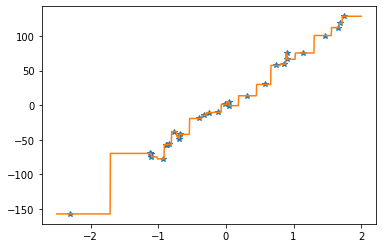

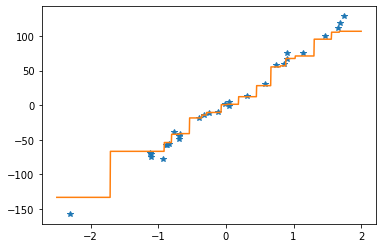

In [4]:
def TrainBoost(alpha,BoostingRounds,x,y):
    g_0 = np.mean(y)
    residuals  = y-alpha*g_0

    # list of basic regressor
    g_boost = []

    for i in range(BoostingRounds):
        h_i = DecisionTreeRegressor(max_depth=1)
        h_i.fit(x,residuals)
        residuals = residuals  - alpha*h_i.predict(x)
        g_boost.append(h_i)

    return g_0, g_boost

def Predict(g_0, g_boost,alpha, x):
    yhat = alpha*g_0*np.ones(len(x))
    for j in range(len(g_boost)):
        yhat = yhat+alpha*g_boost[j].predict(x)
    
    return yhat    


sz = 30
nTest = 15
# create dataset    
X,Y = make_regression(n_samples=sz+nTest, n_features=1, n_informative=1,noise=10.0)
x = np.copy(X[0:sz])
y = np.copy(Y[0:sz])
xTest = np.copy(X[sz:])
yTest = np.copy(Y[sz:])

# boosting algorithm
BoostingRounds = 1000

alphas = [1, 0.005]
    
for alpha in alphas:
    g_0, g_boost = TrainBoost(alpha,BoostingRounds,x,y)
    yhat = Predict(g_0, g_boost, alpha, x)
  
    # plot        
    tmpX =  np.reshape(np.linspace(-2.5,2,1000),(1000,1))
    yhatX = Predict(g_0, g_boost, alpha, tmpX)
    f = plt.figure()
    plt.plot(x,y,'*')
    plt.plot(tmpX,yhatX)
    plt.show()    

## Change boosting round

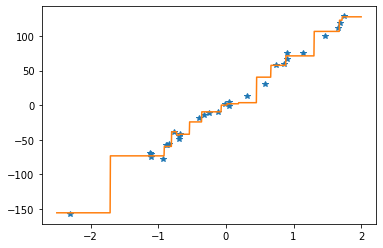

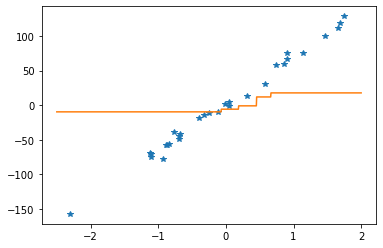

In [5]:
# boosting algorithm
BoostingRounds = 50
    
for alpha in alphas:
    g_0, g_boost = TrainBoost(alpha,BoostingRounds,x,y)
    yhat = Predict(g_0, g_boost, alpha, x)
  
    # plot        
    tmpX =  np.reshape(np.linspace(-2.5,2,1000),(1000,1))
    yhatX = Predict(g_0, g_boost, alpha, tmpX)
    f = plt.figure()
    plt.plot(x,y,'*')
    plt.plot(tmpX,yhatX)
    plt.show()    

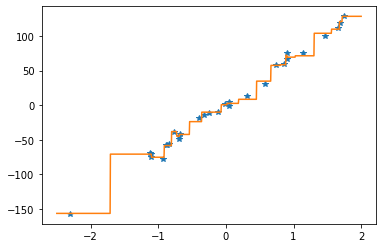

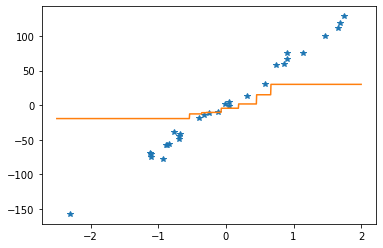

In [6]:
# boosting algorithm
BoostingRounds = 100
    
for alpha in alphas:
    g_0, g_boost = TrainBoost(alpha,BoostingRounds,x,y)
    yhat = Predict(g_0, g_boost, alpha, x)
  
    # plot        
    tmpX =  np.reshape(np.linspace(-2.5,2,1000),(1000,1))
    yhatX = Predict(g_0, g_boost, alpha, tmpX)
    f = plt.figure()
    plt.plot(x,y,'*')
    plt.plot(tmpX,yhatX)
    plt.show()    

## Test loss

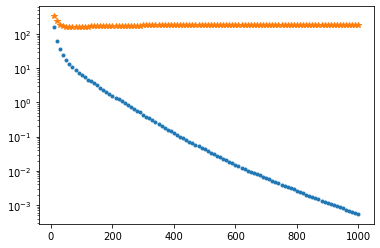

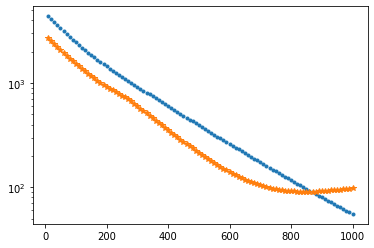

In [7]:
BoostingRounds = 1000
nStep = 10
BB = (np.arange(int(BoostingRounds/nStep))+1)*nStep
MSE_boost = np.zeros(int(BoostingRounds/nStep))
MSE_train = np.zeros(int(BoostingRounds/nStep))
for alpha in alphas:
    for i in range(int(BoostingRounds/nStep)):
        g_0, g_boost = TrainBoost(alpha,(i+1)*nStep,x,y)
        yhat = Predict(g_0, g_boost, alpha, x)
        yTesthat = Predict(g_0, g_boost, alpha, xTest)
        MSE_train[i] = mean_squared_error(y, yhat)
        MSE_boost[i] = mean_squared_error(yTest, yTesthat)
  
    plt.plot(BB,MSE_train,'.')
    plt.plot(BB,MSE_boost,'*')
    plt.yscale('log') 

    plt.show() 

   

## Use sklearn implement

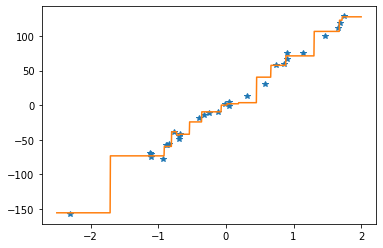

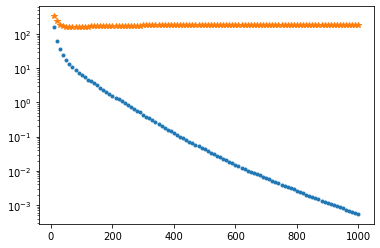

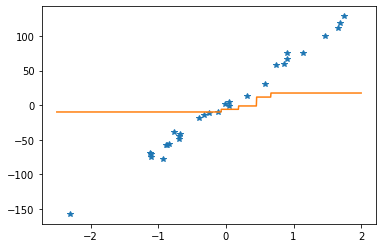

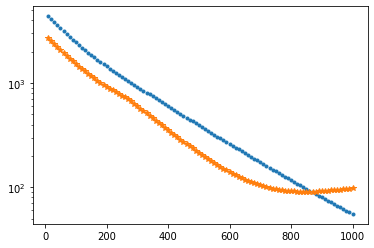

In [8]:
BoostingRounds = 1000
nStep = 10
BB = (np.arange(int(BoostingRounds/nStep))+1)*nStep
MSE_boost = np.zeros(int(BoostingRounds/nStep))
MSE_train = np.zeros(int(BoostingRounds/nStep))
g_0 = DummyRegressor(strategy="mean")
g_0.fit(x, y)
tmpX =  np.reshape(np.linspace(-2.5,2,1000),(1000,1))
for alpha in alphas:
    for i in range(int(BoostingRounds/nStep)):
        reg = GradientBoostingRegressor(random_state=0, n_estimators=(i+1)*nStep, learning_rate=alpha, init=g_0, max_depth=1)
        reg.fit(x, y)
        yhat = reg.predict(x)
        yhatX = reg.predict(tmpX)
        yTesthat = reg.predict(xTest)
        MSE_train[i] = mean_squared_error(y, yhat)
        MSE_boost[i] = mean_squared_error(yTest, yTesthat)
  
        if ((i+1)*nStep == 50):
            f = plt.figure()
            plt.plot(x,y,'*')
            plt.plot(tmpX,yhatX)
            plt.show()

    plt.plot(BB,MSE_train,'.')
    plt.plot(BB,MSE_boost,'*')
    plt.yscale('log') 

    plt.show() 
